# Introduction
In this exercise we minimize the function:
\begin{equation}
E=b(1-e^{-\frac{1}{2}w(x^2+y^2)}) + \frac{1}{2}q(-x^3+y)^2
\end{equation}
whose gradient has components:
\begin{equation}
\nabla E_x = be^{-\frac{1}{2}w(x^2+y^2)}wx - 3qx^2(-x^3+y)
\end{equation}
\begin{equation}
\nabla E_y = be^{-\frac{1}{2}w(x^2+y^2)}wy + q(-x^3+y)
\end{equation}
with 5 different methods.   
The parameters used are: $w=10$, $q=\frac{1}{10}$, $b=20$.

In [1]:
import numpy as np
import time

In [2]:
b = 20
q = 1/10
w = 10

#function to be minimized
def f(x, y):
    return b*(1-np.exp( - (1/2) * w * (x**2 + y**2))) + (q/2) * ( - x**3 + y)**2

#derivative w.r.t x
def fx(x, y):
    return b * np.exp(-1/2 * w * (x**2 + y**2)) * w * x - 3 * q * x**2 *(-x**3 + y)

#derivative w.r.t y
def fy(x, y):
    return b * np.exp(-1/2 * w * (x**2 + y**2)) * w * y + q *(-x**3 + y)

#gradient
def grad_f(param):
    x = param[0]
    y = param[1]
    return [fx(x,y), fy(x,y)]
    

## Plotting function to be minimized

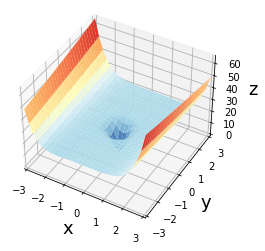

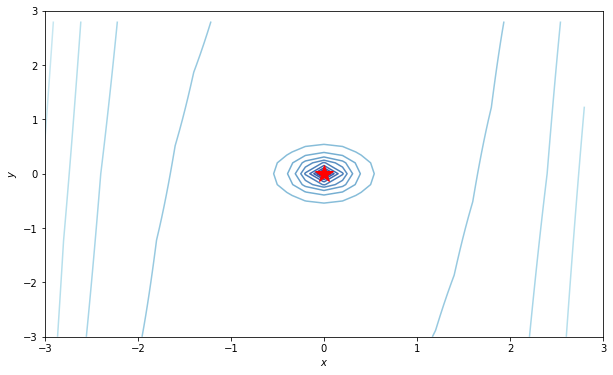

In [3]:
#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest


#Define function for plotting 

def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': 0, 'vmax': 65}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(0, 65)
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def contour_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=f(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-3, 3))
    ax.set_ylim((-3, 3))
    
    return fig,ax

x, y = np.mgrid[-3:3:31j, -3:3:31j]
fig1,ax1=plot_surface(x,y,f(x,y))
fig4,ax4 =contour_function()
plt.show()

## About initial conditions and learning rate
We can see our function is flat in a large fraction of the domain, so there's the risk that if we choose an initial point in that area the algorithm may not be able to improve the solution. Let us see this.

In [4]:
#This implements a simple gradient descent and gradient descent + momentum

def gd(grad, init, n_epochs=5000, eta=10**-4, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params = np.array(init)
    param_traj = np.zeros([n_epochs+1,2])
    param_traj[0,] = init
    v=0;
    grad_sq=0;
    for j in range(n_epochs) :
        noise = noise_strength*np.random.randn(params.size)
        g = np.array(grad(params)) + noise
        v = gamma*v + (1-gamma)*g
        grad_sq = beta*grad_sq + (1-beta)*g*g
        v_hat = v/(1-gamma)
        grad_sq_hat = grad_sq/(1-beta)
        params = params - eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,] = params
    return param_traj

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

## Graphical investigation of the meaning of the parameters

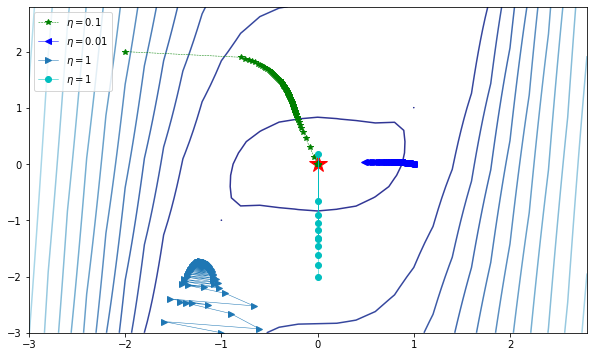

In [27]:
# Investigate effect of learning rate in GD
plt.close()
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.1
eta2=0.01
eta3=1
eta4=1
gd_1=gd(grad_f,init1, n_epochs=100, eta=eta1)
gd_2=gd(grad_f,init2, n_epochs=100, eta=eta2)
gd_3=gd(grad_f,init3, n_epochs=100, eta=eta3)
gd_4=gd(grad_f,init4, n_epochs=10, eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()

We can see that the fact that the learning rate $\eta$ is constant is a strong limitation for our algorithm; we have to choose the learning rate for every starting point and it's not always possibile to find it.
We see also that when the learning rate is too small then the algorithm has difficulty in convergence, or it doesn't even converge, since the step it is taking to reach the minimum is too short.     
Let's see now how our algorithm changes adding momentum    

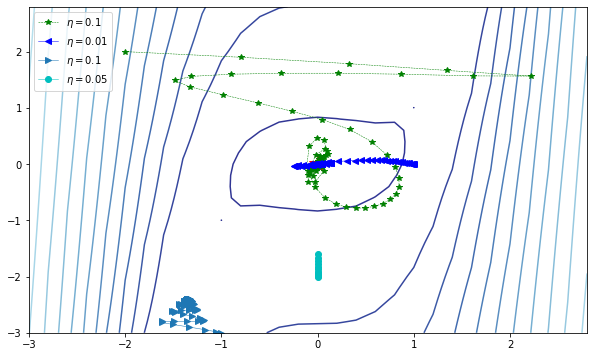

In [32]:
# Investigate effect of momentum in GD
plt.close()
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.1
eta2=0.01
eta3=0.1
eta4=0.05
gd_1=gd_with_mom(grad_f,init1, n_epochs=100, eta=eta1)
gd_2=gd_with_mom(grad_f,init2, n_epochs=100, eta=eta2)
gd_3=gd_with_mom(grad_f,init3, n_epochs=100, eta=eta3)
gd_4=gd_with_mom(grad_f,init4, n_epochs=10, eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()

If we add momentum we can see that the algorithm is less stable; this is equivalent to adding a mass to our imaginary particle, and therefore our algorithm behaves as if describing the motion of a ball on a plane given by the function.
For instance when the initial point is not on the flat part of the surface it starts falling down and it suffers for the change in slope of the function and it follows its curvature. The "ball" bounces, thanks to inertia we have added through momentum, and eventualy reaches the minimum.  

## Graphical investigation of the differences between algorithms
To get a qualitative feel for the different behaviours of the 5 algorithms we pick a sample value of the learning rate and of the starting point, then plot the trajectories obtained with each algorithm using these same parameters.

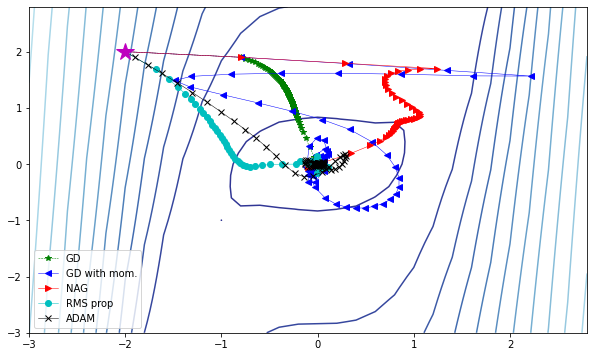

In [7]:
# Investigate effect of learning rate in GD
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point & eta
init1=[-2,2]
eta1=0.1

optimizers = {"GD": gd, "GD with mom.": gd_with_mom, "NAG": NAG, "RMS prop": rms_prop,"ADAM": adams}
plot_list = ['g--*','b-<','r->','c-o','k-x']

for i,opt in enumerate(optimizers) :
    gdn = optimizers[opt](grad_f,init1, n_epochs=1000, eta=eta1)
    overlay_trajectory_contour(ax,gdn,opt,plot_list[i],lw=0.5)

ax.plot(init1[0], init1[1],"m*",markersize=18)

plt.legend(loc=3)
plt.show()

Here we do the same thing but with different starting conditions.

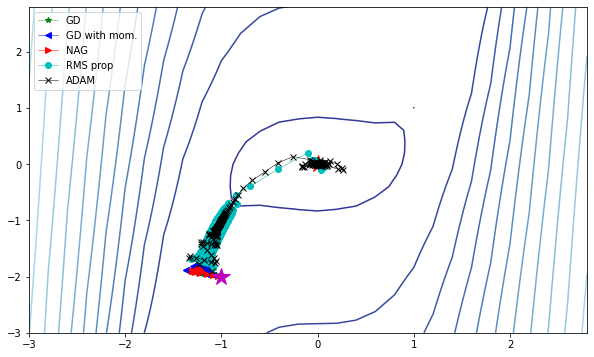

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point & eta
init1=[-1,-2]
eta1=0.1

optimizers = {"GD": gd, "GD with mom.": gd_with_mom, "NAG": NAG, "RMS prop": rms_prop,"ADAM": adams}
plot_list = ['g--*','b-<','r->','c-o','k-x']

for i,opt in enumerate(optimizers) :
    gdn = optimizers[opt](grad_f,init1, n_epochs=1000, eta=eta1)
    overlay_trajectory_contour(ax,gdn,opt,plot_list[i],lw=0.5)

ax.plot(init1[0], init1[1],"m*",markersize=18)

plt.legend(loc=2)
plt.show()

When we change the initial condition it is important to notice that the real differences in the way the algorithm converges are in the choice of the height of the starting point on the surface. When we introduce momentum this gap becomes more clear since the algorithm has in memory the direction of motion of the previous step and it updates not only following the gradient of the function. When the slope is steeper and the function with less changes in curvature we see a situation like the one in the second plot where the "ball" increases its speed and falls from a hill reaching directly the minimum. 

# Statistical analysis
After having chosen the best parameters for each algorithms we want to compare them in terms of accuracy and computation time.

For each algorithm we will try multiple parameter values and choose the one that minimizes the mean squared distance of all found points for each condition.

Let $Q$ be the set of all initial conditions and $A: Q \rightarrow \mathbb{R}$ our algorithm function, which starting from the initial point finds the value for which the function is minimized. We define out test index $t$ as:

$$t = \frac{\sum_{x \in Q} |A(x)|^2}{|Q|}$$

## Best parameters for vanilla GD

In [9]:
#defining all possibile starting point spaced by 1
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1)) #a more coarse grid to reduce execution time
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))])


test_gd = []
for noise_strength in np.linspace(0,0.1,10):
    for eta in np.logspace(-4,-1,4):
        gd_1 = []
        for init1 in starting_points:
            gd_1.append(gd(grad_f,init1, eta=eta, n_epochs=100, noise_strength=noise_strength)[-1]) #we use a small n_epochs to speed up the execution; this is reasonable since here we're not interested in reaching complete convergece
    
        test_gd.append((np.array(gd_1)**2).sum(axis = 1).mean())

print(np.array(test_gd).reshape((10,4)))
#this reshape is reasonable because this way each row represents a noise value, whereas each column is a learning rate value

[[5.79098822 4.70720958 3.6088476         nan]
 [5.79098112 4.7072203  3.60812046        nan]
 [5.79097776 4.70710298 3.60770074        nan]
 [5.79101507 4.70707595 3.60988044        nan]
 [5.79101315 4.7072641  3.60725549        nan]
 [5.79103362 4.70683623 3.6083161         nan]
 [5.79094082 4.70726237 3.60917233        nan]
 [5.7909523  4.70669416 3.60676629        nan]
 [5.79096136 4.70801522 3.61852589        nan]
 [5.7909161  4.70672851 3.61365301        nan]]


We see the best learning rate is 0.01 (if we increase in logarithmic scale the learning rate to 0.1 the results will be unstable and the algorithm will return NaN's).    
We notice that stochasticity does not play an important role in the algorithm.

## Best parameters for GD with momentum

In [10]:
test_gdm = []
for gamma in np.linspace(0.8,0.99,20):
    for eta in np.logspace(-4,-1,4):
        gd_1 = []
        for init1 in starting_points:
            gd_1.append(gd_with_mom(grad_f,init1, eta=eta, gamma = gamma, n_epochs=100)[-1])
    
        test_gdm.append((np.array(gd_1)**2).sum(axis = 1).mean())

print(np.array(test_gdm).reshape((20,4)))
#this reshape is reasonable because this way each row represents a gamma value, whereas each column is a learning rate value

[[5.04916008 3.90486759 2.26931555        nan]
 [5.02144536 3.87533488 2.22232504        nan]
 [4.99200041 3.84269378 2.16788338        nan]
 [4.96060611 3.80597467 2.10515698        nan]
 [4.92699617 3.7636334  2.03689964        nan]
 [4.89084161 3.71290323 1.96200047        nan]
 [4.85172804 3.6497427  1.86880878        nan]
 [4.80912126 3.58318449 1.87677234        nan]
 [4.76231385 3.50610235 1.92931945        nan]
 [4.71033924 3.4164441  1.90574203        nan]
 [4.65183039 3.32655396 1.83570764        nan]
 [4.58478474 3.2564858  1.65639523        nan]
 [4.50618132 3.21956902 1.49043202        nan]
 [4.41141733 3.19220247 1.2497771         nan]
 [4.29375647 3.0800975  0.89477534        nan]
 [4.14497394 2.8714639  0.80745442        nan]
 [3.96158355 2.68265406 0.80844169        nan]
 [3.77344139 2.87730761 1.21698517        nan]
 [3.713239   2.72626438 1.36421471        nan]
 [4.15192568 2.9739477  2.15348192        nan]]


We see the best learning rate is 0.01 (if we increase in logarithmic scale the learning rate to 0.1 then the results will be unstable and the algorithm will return NaN's). We see that the best value for gamma is 0.95 and that different, close values can change a lot the result of the algorithm.

## Best parameters for NAG

In [11]:
test_nag = []
for gamma in np.linspace(0.8,0.99,20):
    for eta in np.logspace(-4,-1,4):
        gd_1 = []
        for init1 in starting_points:
            gd_1.append(NAG(grad_f,init1, eta=eta, gamma = gamma, n_epochs=100)[-1])
    
        test_nag.append((np.array(gd_1)**2).sum(axis = 1).mean())

print(np.array(test_nag).reshape((20,4)))
#this reshape is reasonable because this way each row represents a gamma value, whereas each column is a learning rate value

[[5.05578952 3.92320051 2.28148017        nan]
 [5.02836758 3.89599148 2.24956233        nan]
 [4.99924117 3.86644861 2.2110256         nan]
 [4.96819667 3.83398871 2.16583411        nan]
 [4.93497523 3.79775822 2.11310945        nan]
 [4.89925831 3.75642664 2.05192446        nan]
 [4.86064643 3.70769519 1.9916733         nan]
 [4.81862746 3.64697816 1.95768667        nan]
 [4.77252733 3.5747853  1.85552305        nan]
 [4.72143127 3.49514526 1.783276          nan]
 [4.6640538  3.39515932 1.74945364        nan]
 [4.59852044 3.2827886  1.72435649        nan]
 [4.52200273 3.18097152 1.65303512        nan]
 [4.43014588 3.13400716 1.49006334        nan]
 [4.31637122 3.09423609 1.40472119        nan]
 [4.17191691 2.96242956 1.26733138        nan]
 [3.99030379 2.74238036 0.93595511        nan]
 [3.79064048 2.61705674 0.66465049        nan]
 [3.68532192 2.90779029 0.73365581        nan]
 [4.03261321 2.49538327 1.55871854        nan]]


The best gamma is 0.97, the best eta is 0.01.

## Best parameters for RMS Prop

In [12]:
test_rms = []
for beta in np.linspace(0.8,0.99,20):
    for eta in np.logspace(-2,1,4):
        gd_1 = []
        for init1 in starting_points:
            gd_1.append(rms_prop(grad_f,init1, eta=eta, beta = beta, n_epochs=100)[-1]) 
    
        test_rms.append((np.array(gd_1)**2).sum(axis = 1).mean())

print(np.array(test_rms).reshape((20,4)))
#this reshape is reasonable because this way each row represents a beta value, whereas each column is a learning rate value
v = np.array(test_rms).reshape((20,4))
[a,b] = np.array(np.nonzero(v == v.min())).ravel()
beta_best_rms = np.linspace(0.8,0.99,20)[a]
eta_best_rms = np.logspace(-2,1,4)[b]

[[4.00189097e+00 3.13562518e+00 9.82594265e-01 2.10731418e+02]
 [4.00589401e+00 3.29219357e+00 9.22751216e-01 6.66136307e+01]
 [4.01023862e+00 3.37193383e+00 1.36803178e+00 8.41964047e+01]
 [4.01442409e+00 3.40011508e+00 1.18679151e+00 1.06807991e+02]
 [4.01930420e+00 3.38235910e+00 1.82003651e+00 5.00139159e+01]
 [4.02435782e+00 3.48573946e+00 1.61146149e+00 1.07602556e+02]
 [4.03005665e+00 3.54337077e+00 2.12205871e+00 1.18154417e+02]
 [4.03461800e+00 3.63043649e+00 1.36324508e+00 1.25903464e+02]
 [4.04240039e+00 3.66414270e+00 2.61502544e+00 1.35330172e+02]
 [4.04828188e+00 3.70299273e+00 2.03374951e+00 1.58688048e+02]
 [4.05448591e+00 3.76015066e+00 2.25173821e+00 1.70553578e+02]
 [4.06077018e+00 3.77012528e+00 1.36801416e+00 1.96066073e+02]
 [4.06616553e+00 3.83838151e+00 1.30093935e+00 2.01633502e+02]
 [4.07024697e+00 3.88149516e+00 1.74128200e+00 2.09553824e+02]
 [4.07122315e+00 3.92178912e+00 2.26998496e+00 2.18863498e+02]
 [4.06614008e+00 3.99045235e+00 3.10612700e+00 1.920767

We see the best learning rate is 1 (if we increase in logarithmic scale the learning rate to 10 then the results will be unstable and the algorithm will return bigger and bigger values). We see that the best value for beta is 0.8 and that different, close values can change a lot the result of the algorithm.

## Best parameters for ADAM

In [13]:
test_adam = []

gamma_list = np.linspace(0.8,0.99,5)
eta_list = np.logspace(-4,-1,4)
beta_list = np.linspace(0.8,0.99,5)

for gamma in gamma_list :
    for eta in eta_list :
        for beta in beta_list :
            gd_1 = []
            for init1 in starting_points:
                gd_1.append(adams(grad_f, init1, eta = eta, gamma = gamma, beta = beta, n_epochs=100)[-1])
            test_adam.append((np.array(gd_1)**2).sum(axis = 1).mean())

print(np.array(test_adam).reshape((5,4,5))) #each index represents respectively eta, gamma and beta in tensor like notation

v = np.array(test_adam).reshape((5,4,5)) #gamma, eta, beta
indices = np.array(np.where(v == v.min())).ravel()
gamma_best_adam = gamma_list[indices[0]]
eta_best_adam = eta_list[indices[1]]
beta_best_adam = beta_list[indices[2]]

[[[6.24829125e+00 6.25822401e+00 6.26952900e+00 6.28280933e+00
   6.29822625e+00]
  [5.55497055e+00 5.64108006e+00 5.74106557e+00 5.86046252e+00
   6.00084103e+00]
  [3.25338189e+00 3.47010423e+00 3.67569952e+00 3.95977593e+00
   4.38638195e+00]
  [4.56434526e-01 1.35187540e+00 2.09678453e+00 2.79816291e+00
   3.17424616e+00]]

 [[6.22418227e+00 6.23702728e+00 6.25167124e+00 6.26890677e+00
   6.28894525e+00]
  [5.35922432e+00 5.46387775e+00 5.58819327e+00 5.73961089e+00
   5.91798671e+00]
  [2.90542201e+00 3.23478293e+00 3.53101473e+00 3.79031506e+00
   4.18607411e+00]
  [6.35438900e-02 1.79108330e-01 4.48270832e-01 1.46349903e+00
   2.26918659e+00]]

 [[6.18084801e+00 6.19897243e+00 6.21969253e+00 6.24416775e+00
   6.27271102e+00]
  [5.02614486e+00 5.16495789e+00 5.33041317e+00 5.53298960e+00
   5.77780394e+00]
  [1.75616363e+00 2.44134645e+00 3.09167780e+00 3.59958185e+00
   3.90167347e+00]
  [2.28191809e+00 5.27377257e-04 1.15786994e-01 1.60950895e-01
   5.91089805e-01]]

 [[6.08105

In [15]:
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))]) #each point in Q

[test_1,test_2,test_3,test_4,test_5] = [[],[],[],[],[]]

for init1 in starting_points:
    gd_1 = gd(grad_f,init1, eta=10**-2) #in each of these lines we use the best values found
    test_1.append((np.array(gd_1)**2).sum(axis = 1))

    gd_2 = gd_with_mom(grad_f,init1, eta=10**-2,gamma=0.97) #we're using 5000 epochs, now
    test_2.append((np.array(gd_2)**2).sum(axis = 1))

    gd_3 = NAG(grad_f,init1, eta=10**-2,gamma=0.97)
    test_3.append((np.array(gd_3)**2).sum(axis = 1))

    gd_4 = rms_prop(grad_f,init1, eta=eta_best_rms, beta=beta_best_rms)
    test_4.append((np.array(gd_4)**2).sum(axis = 1))

    gd_5 = adams(grad_f,init1, eta=eta_best_adam, gamma=gamma_best_adam, beta=beta_best_adam)
    test_5.append((np.array(gd_5)**2).sum(axis = 1))

#this time we calculate the parameter t for each iteration
test_best_gd = np.array(test_1).mean(axis = 0)
test_best_gd_mom = np.array(test_2).mean(axis = 0)
test_best_nag = np.array(test_3).mean(axis = 0)
test_best_rms_prop = np.array(test_4).mean(axis = 0)
test_best_adam = np.array(test_5).mean(axis = 0)

# Plotting a comparison between different algorithms
Notice that t (represented in the y axis) is not the time but the accuracy parameter we have defined

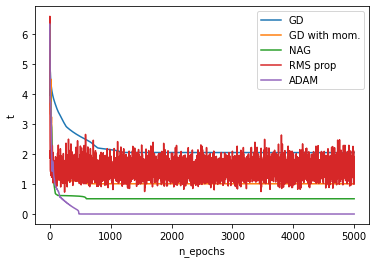

In [16]:
#we redefine the dictionary used before
optimizers = {"GD": test_best_gd, "GD with mom.": test_best_gd_mom, "NAG": test_best_nag, "RMS prop": test_best_rms_prop,"ADAM": test_best_adam}

for opt in optimizers :
    plt.plot(range(0,5001),optimizers[opt],label = opt)


plt.xlabel('n_epochs')
plt.ylabel('t')
#plt.xscale('log')
plt.legend()
plt.show()

We notice that in terms of performance we obtain: GD<GD with momentum<NAG<ADAM, which is what we would expect given the increasing complexity of these algorithms.   
RMS prop seems to be unstable; even though a more extensive grid search for the parameters may fix this isn't unreasonable, since RMS normalizes the gradient without momentum (whereas e.g. ADAM normalizes the gradient with momentum).